In [1]:
from sklearn.manifold import Isomap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Lab Assignment 5

Now that you've had your first taste of isomap, let's take your knowledge of it to the next level.

Whatever your high-dimensional samples are, be they images, sound files, or thoughtfully collected attributes, they can all be considered single points in a high dimensional feature-space. Each one of your observations is just a single point. Even with a high dimensionality, it's possible that most or all your samples actually lie on a lower dimension surface. Isomap aims to capture that embedding, which is essentially the motion in the underlying, non-linear degrees of freedom.

By testing isomap on a carefully constructed dataset, you will be able to visually confirm its effectiveness, and gain a deeper understanding of how and why each parameter acts the way it does. The ALOI, Amsterdam Library of Object Images, hosts a huge collection of 1000 small objects that were photographed in such a controlled environment, by systematically varying the viewing angle, illumination angle, and illumination color for each object separately. To really drive home how well isomap does what it claims, this lab will make use of two image sets taken from the ALOI's collection.



<img src="./bear1.png" style="float:left"/> <img src="./bear2.png"/>

Manifold extraction, and isomap specifically are really good with vision recognition problems, speech problems, and many other real-world tasks, such as identifying similar objects, or objects that have undergone some change. In the case of the 3D rotating object such as the office chair example from earlier, if every pixel is a feature, at the end of the day, the manifold surface is parametrizable by just the angle of the chair—a single feature!

1.  Start by having a look through the Module4/Datasets/ALOI/ directory. There are two directories filled with 192 x 144 pixel images. Identify their ordering and try to figure out what's changing between the images. They might not be perfectly ordered, but that doesn't matter to isomap.
2.  Create a regular Python list object. Then, write a for-loop that iterates over the images in the Module4/Datasets/ALOI/32/ folder, appending each of them to your list. Each .PNG image should first be loaded into a temporary NDArray, just as shown in the Feature Representation reading.

    Optional: Resample your images down by a factor of two if you have a slower computer. You can also convert the image from  0-255  to  0.0-1.0  if you'd like, but that will have no effect on the algorithm's results.    
    

3.  Convert the list to a dataframe and run isomap on it to compute the lower dimensional embedding. Be sure to set n_components to 3 so you can visualize your manifold. You can also set the neighborhood size to six.
4.  Plot the first two manifold components using a 2D scatter plot, then plot the first three components using a 3D scatter plot. Run your assignment and then answer the questions below.

In [2]:
bears = []
path = './Datasets/ALOI/32'
for f in os.listdir(path):
    if '.png' in f:
        pic = mpimg.imread(os.path.join(path,f))
        bears.append(pic.flatten())

In [3]:
bears[:2]

[array([ 0.01568628,  0.01568628,  0.01568628, ...,  0.04313726,
         0.03921569,  0.02352941], dtype=float32),
 array([ 0.01568628,  0.01568628,  0.01568628, ...,  0.04313726,
         0.04313726,  0.02352941], dtype=float32)]

In [4]:
bears = pd.DataFrame(bears)

In [5]:
bears.shape

(72, 27648)

In [6]:
iso = Isomap(n_components=3)
iso.fit(bears)
T = iso.transform(bears)

In [7]:
T.shape

(72, 3)

In [8]:
isodf = pd.DataFrame(T, columns=['a', 'b', 'c'])

In [9]:
isodf.head()

a          b          c
0 -63.040364  31.627645 -21.360774
1 -53.587640 -37.725613  18.459892
2 -64.728572 -18.815523   2.718522
3  40.344698 -50.125188  -7.508886
4  48.450883 -41.420726   4.750628

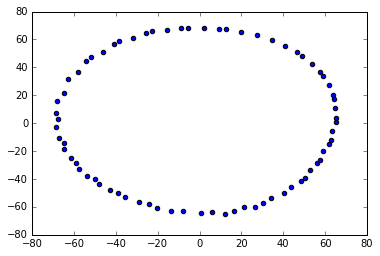

In [10]:
plt.scatter(isodf.a, isodf.b)

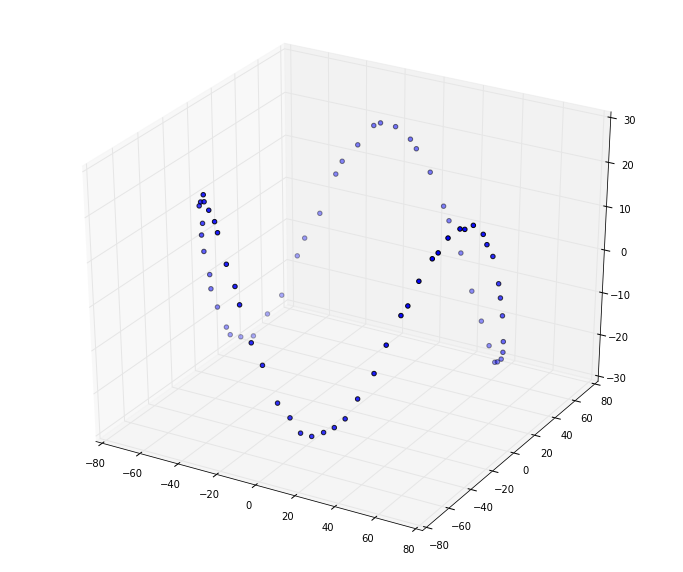

In [11]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(isodf.a, isodf.b, isodf.c)

In [13]:
bears[0]

0     0.015686
1     0.015686
2     0.015686
3     0.015686
4     0.015686
5     0.011765
6     0.015686
7     0.015686
8     0.015686
9     0.015686
10    0.015686
11    0.015686
12    0.015686
13    0.015686
14    0.015686
15    0.015686
16    0.015686
17    0.015686
18    0.015686
19    0.015686
20    0.015686
21    0.015686
22    0.015686
23    0.015686
24    0.015686
25    0.015686
26    0.015686
27    0.015686
28    0.015686
29    0.015686
        ...   
42    0.019608
43    0.015686
44    0.015686
45    0.015686
46    0.015686
47    0.015686
48    0.015686
49    0.015686
50    0.015686
51    0.015686
52    0.015686
53    0.015686
54    0.015686
55    0.015686
56    0.015686
57    0.015686
58    0.015686
59    0.015686
60    0.019608
61    0.015686
62    0.015686
63    0.015686
64    0.015686
65    0.015686
66    0.015686
67    0.015686
68    0.015686
69    0.015686
70    0.015686
71    0.015686
Name: 0, dtype: float64